In [1]:
#let's load a gpkg file 

import geopandas as gpd
import pandas as pd 

#load the file
gdf = gpd.read_file('data/contours-iris.gpkg')

In [2]:
gdf.head()

,cleabs,code_insee,nom_commune,iris,code_iris,nom_iris,type_iris,geometry
0,IRIS____0000000670430101,67043,Bischheim,0101,670430101,Annexe,A,"MULTIPOLYGON (((1052346.7 6848413, 1052502.3 6..."
1,IRIS____0000000132020101,13202,Marseille 2e Arrondissement,0101,132020101,Arenc,A,"MULTIPOLYGON (((891859 6248420, 891827 6248420..."
2,IRIS____0000000561850101,56185,Quéven,0101,561850101,B.A.N. Lann Bihoué,A,"MULTIPOLYGON (((219079.3 6760205.2, 219092.3 6..."
3,IRIS____0000000930630101,93063,Romainville,0101,930630101,Bas Pays,A,"MULTIPOLYGON (((657957.7 6866026.2, 658042.5 6..."
4,IRIS____0000000940480101,94048,Marolles-en-Brie,0101,940480101,Bois de Notre-Dame,A,"MULTIPOLYGON (((666452.1 6849977.7, 666654.7 6..."


In [27]:
# Convert the 'code_insee' column to numeric, setting errors='coerce' to handle non-numeric values
gdf['code_insee'] = pd.to_numeric(gdf['code_insee'], errors='coerce')

# Drop rows with NaN values in 'code_insee' column
gdf = gdf.dropna(subset=['code_insee'])

# Convert the 'code_insee' column to integer
gdf['code_insee'] = gdf['code_insee'].astype(int)

# Filter the DataFrame
gdf_baule = gdf[gdf['code_insee'] ==  44055]
gdf_baule.head()

,cleabs,code_insee,nom_commune,iris,code_iris,nom_iris,type_iris,geometry
1851,IRIS____0000000440550101,44055,La Baule-Escoublac,0101,440550101,La Baule les Pins,H,"MULTIPOLYGON (((295731.9 6699495.6, 295716.5 6..."
3039,IRIS____0000000440550102,44055,La Baule-Escoublac,0102,440550102,Centre-Benoît,H,"MULTIPOLYGON (((293529.9 6700479.4, 293210 670..."
4924,IRIS____0000000440550103,44055,La Baule-Escoublac,0103,440550103,Gare-Grand Clos,H,"MULTIPOLYGON (((290046.7 6700540.7, 290054 670..."
5788,IRIS____0000000440550104,44055,La Baule-Escoublac,0104,440550104,Beslon,H,"MULTIPOLYGON (((291802.4 6701410.4, 291824.4 6..."
6709,IRIS____0000000440550105,44055,La Baule-Escoublac,0105,440550105,Escoublac,H,"MULTIPOLYGON (((293042 6702758.2, 293092.8 670..."


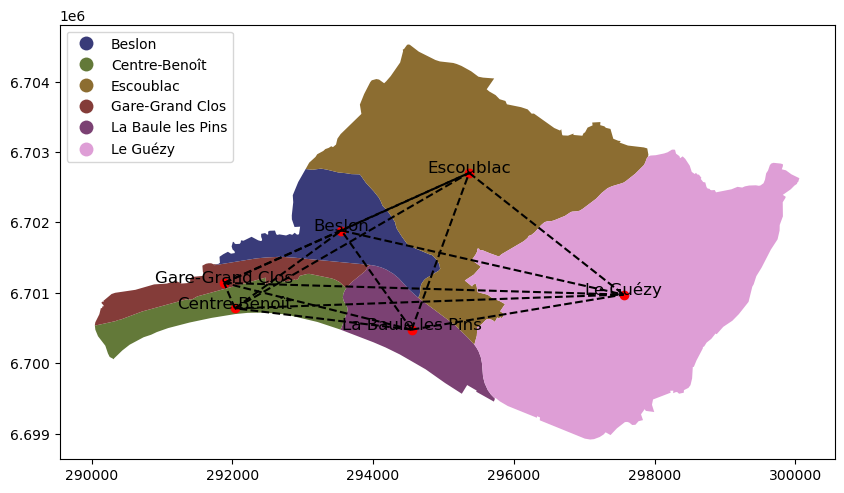

In [37]:
# let's show the data, while showung the name of the iris 
#make the plot bigger

import matplotlib.pyplot as plt
from shapely.geometry import LineString

fig, ax = plt.subplots(figsize=(10, 10))

gdf_baule.plot(ax=ax, column='nom_iris', legend=True, legend_kwds={'loc': 'upper left'}, cmap='tab20b')

#add the centroid of each zone

gdf_baule.centroid.plot(ax=ax, color='red')

#add a node between each centroid 

for i, row in gdf_baule.iterrows():
    centroid = row.geometry.centroid
    ax.text(centroid.x, centroid.y, row['nom_iris'], fontsize=12, ha='center')

# Create and plot lines between each pair of centroids
for i, row1 in gdf_baule.iterrows():
    for j, row2 in gdf_baule.iterrows():
        if i < j:  # To avoid duplicate lines
            line = LineString([row1['centroid'], row2['centroid']])
            ax.plot(*line.xy, color='black', linestyle='--')


plt.show()

In [41]:
import folium
from folium import features
import geopandas as gpd
from shapely.geometry import LineString

# Filter the data for La Baule-Escoublac
gdf_baule = gdf[gdf['code_insee'] == 44055].copy()

# Calculate centroids
gdf_baule.loc[:, 'centroid'] = gdf_baule.geometry.centroid

# Create a Folium map centered around La Baule-Escoublac
m = folium.Map(location=[gdf_baule.geometry.centroid.y.mean(), gdf_baule.geometry.centroid.x.mean()], zoom_start=13)


# Display the map
m.save('map.html')
m